### Perform gradient domain **Poisson blending**

1. Find the x and y gradients of the source and destination images
2. Copy the gradients from source images to the destination image
3. Integration in the gradients domain with Dirichlet boundary conditions

What if you did it in just 5 lines of code ? Now that won’t just be cool, it would be seriously badass!

Use **cv2.seamlessClone** - does all the above for you! 



# Seamless Cloning Example
    
### Function Syntax
    
A quick look at the usage first

```python
output = cv2.seamlessClone(src, dst, mask, center, flags)
```

Where,

- **`src`** - Source image that will be cloned into the destination image. In our example it is the airplane.
- **`dst`** - Destination image into which the source image will be cloned. In our example it is the sky image.
- **`mask`** - A rough mask around the object you want to clone. This should be the size of the source image. Set it to an all white image if you are lazy!
- **`center`** - Location of the center of the source image in the destination image.
- **`flags`** - The two flags that currently work are NORMAL_CLONE and MIXED_CLONE. I have included an example to show the difference.
- **`output`** - Output / result image.

Now let’s look at the code that I used to generate the images above.



In [1]:
# Standard imports
import cv2
import numpy as np 
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
# Read images
src = cv2.imread(DATA_PATH + "images/airplane.jpg")
dst = cv2.imread(DATA_PATH + "images/sky.jpg")

In [19]:
# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))

In [5]:
# This is where the CENTER of the airplane will be placed
center = (800,100)

In [10]:
# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

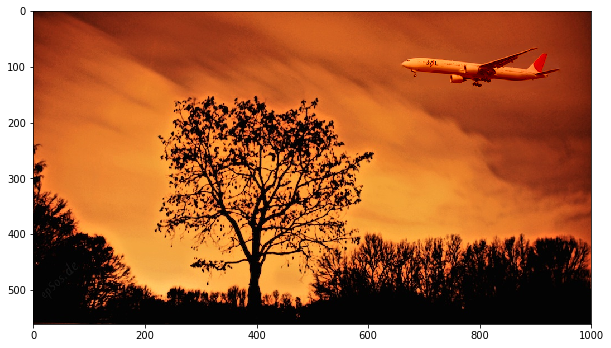

In [11]:
plt.imshow(output[:,:,::-1])
plt.show()

In the above example, the cloning type ( `flags` ) I used was `NORMAL_CLONE`. There is another type, `MIXED_CLONE`, that is subtly different from `NORMAL_CLONE`. Let’s see how the two types differ in detail.

In [14]:
# Read images : src image will be cloned into dst
im = cv2.imread(DATA_PATH + "images/wood-texture.jpg")
obj= cv2.imread(DATA_PATH + "images/iloveyouticket.jpg")

In [15]:
# Create an all white mask
mask = 255 * np.ones(obj.shape, obj.dtype)

In [16]:
# The location of the center of the src in the dst
width, height, channels = im.shape
center = (height//2, width//2)

In [17]:
# Seamlessly clone src into dst and put the results in output
normal_clone = cv2.seamlessClone(obj, im, mask, center, cv2.NORMAL_CLONE)
mixed_clone = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)

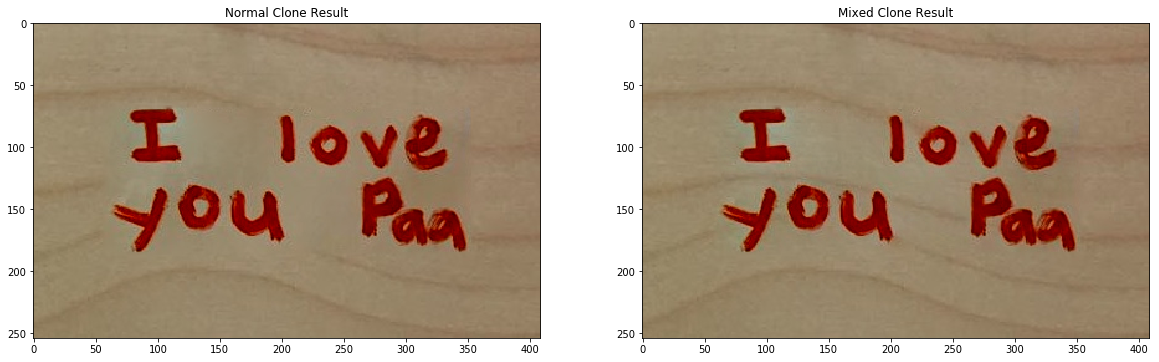

In [20]:
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.title("Normal Clone Result")
plt.imshow(normal_clone[:,:,::-1])
plt.subplot(1,2,2)
plt.title("Mixed Clone Result")
plt.imshow(mixed_clone[:,:,::-1])
plt.show()

## Observations 
    
1. If we use Normal Cloning by using the `NORMAL_CLONE` flag, we did not use a good mask and you can see excessive smoothing between the words “I” and “Love”, and between “you” and “Paa”. Sure we were lazy. We could have created a rough mask and improved the result.  But if you are lazy and smart, you would use Mixed Cloning.
1. **In Normal Cloning the texture ( gradient ) of the source image is preserved in the cloned region.**
1. In Mixed Cloning, the texture ( gradient ) of the cloned region is determined by a combination of the source and the destination images. 
1. **Mixed Cloning does not produce smooth regions because it picks the dominant texture ( gradient ) between the source and destination images**. Notice the texture for mixed cloning is no longer smooth between “I” and “Love”, and “you” and “Paa”. Lazy people cheer!
